<a href="https://colab.research.google.com/github/Labdhiiii/GIT-Learning/blob/master/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Decision Tree ---
Accuracy: 0.7061745919091554
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1036
           1       0.45      0.49      0.47       373

    accuracy                           0.71      1409
   macro avg       0.63      0.64      0.63      1409
weighted avg       0.71      0.71      0.71      1409



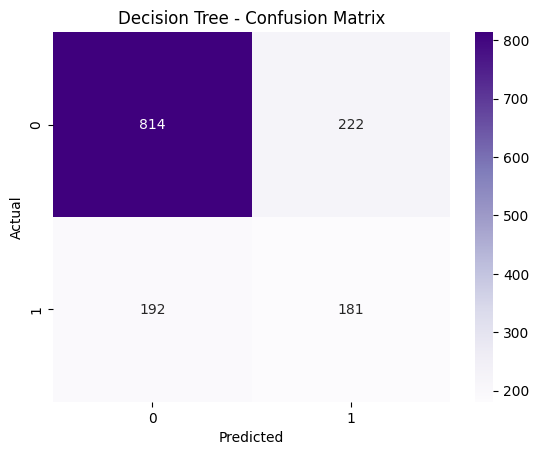


--- Random Forest ---
Accuracy: 0.801277501774308
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



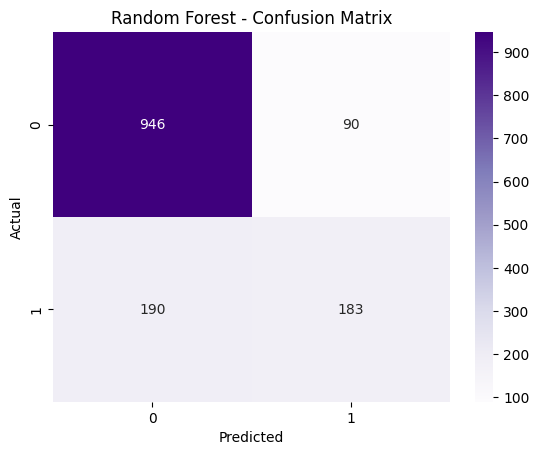

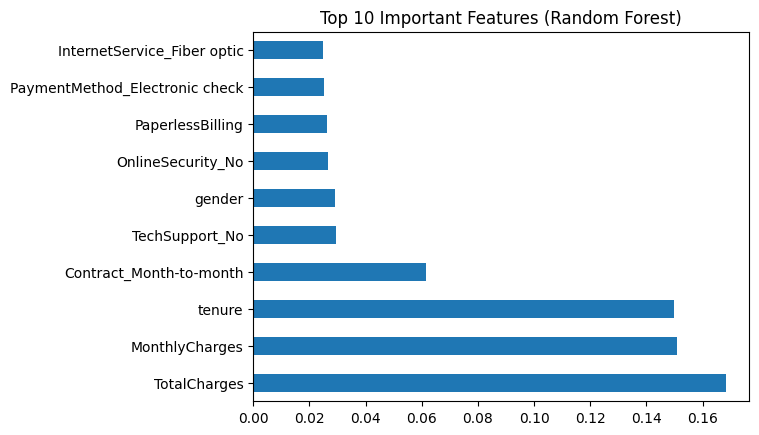

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop irrelevant columns
df.drop('customerID', axis=1, inplace=True)

# Encode categorical columns
binary_cols = df.nunique()[df.nunique() == 2].keys().tolist()
multi_cols = [col for col in df.select_dtypes(include='object').columns if col not in binary_cols]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=multi_cols)

# Split into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate both
def evaluate(title, y_true, y_pred):
    print(f"\n--- {title} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Purples')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate("Decision Tree", y_test, y_pred_dt)
evaluate("Random Forest", y_test, y_pred_rf)

# Feature Importance Plot
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()




### 🔹 **1. Decision Tree - Confusion Matrix**

![Confusion Matrix for Decision Tree](attachment\:file-SeyAxHvW4cFtJwu9CJg5Xp)

This matrix tells us how well the decision tree classifier predicted the outcomes.

|                | Predicted No (0) | Predicted Yes (1) |
| -------------- | ---------------- | ----------------- |
| Actual No (0)  | **814**          | 222               |
| Actual Yes (1) | **192**          | 181               |

* **True Negatives (TN)**: 814 — Model correctly predicted customers who did *not* churn.
* **False Positives (FP)**: 222 — Model wrongly predicted churn when there was none.
* **False Negatives (FN)**: 192 — Model missed predicting churn.
* **True Positives (TP)**: 181 — Model correctly predicted churn.

🔍 *Interpretation*: The model performs better on predicting non-churners (class 0), but struggles more with predicting churn (class 1), showing imbalance or overfitting.

---

### 🔹 **2. Random Forest - Confusion Matrix**

![Confusion Matrix for Random Forest](attachment\:file-QSkYz41N9AbvAHcqeN12Sv)

|                | Predicted No (0) | Predicted Yes (1) |
| -------------- | ---------------- | ----------------- |
| Actual No (0)  | **946**          | 90                |
| Actual Yes (1) | **190**          | 183               |

Compared to the decision tree:

* **More true negatives**: 946 (better at classifying non-churners).
* **Less false positives**: Only 90 now!
* **True positives**: Slight improvement to 183.

✅ **Conclusion**: The **random forest model performs better**. It reduces misclassifications and generalizes better because it combines many decision trees.

---

### 🔹 **3. Feature Importance from Random Forest**

![Feature Importance](attachment\:file-AghYVSkVJDZ5cJno7r9UfJ)

This bar chart tells you which features are most important for predicting churn:

| Feature                        | Importance |
| ------------------------------ | ---------- |
| **TotalCharges**               | ⭐ Highest  |
| **MonthlyCharges**             | High       |
| **tenure**                     | High       |
| **Contract\_Month-to-month**   | Medium     |
| Others (gender, support, etc.) | Lower      |

💡 *Meaning*: Customers with high `TotalCharges`, `MonthlyCharges`, and shorter `tenure` are more likely to churn.

---

### 🔍 TL;DR - Final Summary

* **EDA (Exploratory Data Analysis)** helps you understand the dataset (you did this first).
* **Decision Tree** works, but has limitations and misclassifies churners often.
* **Random Forest** improves accuracy, especially for predicting *non-churners*.
* **Feature Importance** tells you which attributes most influence customer churn (helpful for business decisions).

Let me know if you want help visualizing precision, recall, or F1 score too. Want to export these results into a report?
